README: <br>
- try using clustering to assign labels for unlabeled data, based on review shared similar word vectors
- applied clustering methods, e.g., K-means
- reference: 
    * [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) 
    * [kaggle BASIC SEMI-SUPERVISED LEARNING MODELS](https://www.kaggle.com/altprof/basic-semi-supervised-learning-models)

In [2]:
import pandas as pd
import os
os.chdir('/Users/liyuan/desktop/CSAir/codes')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import time
import json
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import confusion_matrix, classification_report

from semi_supervise import Semi_Supervise

In [3]:
ss = Semi_Supervise()
# load labeled data
labeled_data = ss.load_labeled_data('../res/labeled_data_with_without_tk.csv')
labeled_data.head()

there are 1550 examples in labeled dataset


,review,review_tokens,label,label_encoded
0,生日优惠券还有领取时间限制的？！下次希望能标注一下领取时间限制,生日 优惠券 领取 时间 下次 希望 标注 领取 时间,计划,7
1,参加了11月1号的“11.11购50元抵用券”，至今未收到该优惠券。,参加 月 号 购 元 抵用券 未 收到 优惠券,计划,7
2,扑街，没有跟星巴克合作5折优惠，写上去干尼玛啊,扑街 星巴克 合作 折 优惠 写上去 干 尼玛,计划,7
3,请问广州飞墨尔本的航班超额行李要多少钱1kg.我收到你们发的信息是4折，但具体多少钱1kg不知道,请问 广州 飞 墨尔本 航班 超额 行李 钱 收到 发 信息 折 钱,计划,7
4,請問帶一個20吋行李箱加電腦後背包是否需加行李費,請 問帶 一個 吋 行李箱 加電腦 後 背包 需加 行李 費,计划,7


In [4]:
# load unlabeled data
unlabeled_data = ss.load_unlabeled_data_csv('../res/unlabeled_review_5000.csv')
# concatenate labeled and unlabeled data
data_concat = ss.concat_data()
data_concat.head()

,review,review_tokens,label,label_encoded
0,NaN,想 积分换 购 机票,N/A,NaN
1,机场值机，电子登机牌不能登录？？？,机场 值机 电子 登机牌 登录,出发,1.0
2,NaN,国际航班 选座 操作,N/A,NaN
3,订机票，查询航班首选南方航空，暑假赶紧带孩子出去旅游，释放心情！,订机票 查询 航班 首选 南方 航空 暑假 赶紧 孩子 旅游 释放 心情,预订,9.0
4,NaN,订 南航 官网 机票 电子客票 号 南航 官网 验真,N/A,NaN


In [35]:
# get X and y
X = ss.get_X().toarray()
y = data_concat.label_encoded.values

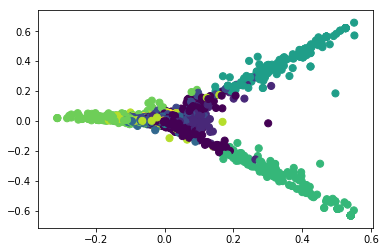

In [36]:
# clustering using K-means + majority vote => decide the unlabeled data
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# since there are 10 label class in total, clustering them into 10 classes
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# use PCA and plot the clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

note: K-mean clustering does not separate the data very well <br>
one assumption is that k-means are suitable for linear clustering

In [40]:
# TODO: try plot T-SNE
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

In [37]:
# TODO: try another clustering metric: SpectralClustering => too slow
from sklearn.cluster import SpectralClustering

# since there are 10 label class in total, clustering them into 10 classes
s_clustering = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',assign_labels='kmeans').fit(X)
y_kmeans = s_clustering.predict(X)

# use PCA and plot the clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

KeyboardInterrupt: 